In [6]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
import os

In [ ]:
import statistics

file_path_to_test_data = os.environ.get("HW1_QUESTION1_DATASET_PATH") + "test_data.txt"
file_path_to_entire_data = os.environ.get("HW1_QUESTION1_DATASET_PATH") + "acm.txt"
with open(file_path_to_entire_data) as f:
    lines = f.readlines()

entire_dataset = []
datapoint = {}
for line in lines:
    if line.startswith("#*"):
        datapoint['title'] = line[2:-1]
    elif line.startswith("#t"):
        datapoint['year'] = int(line[2:-1])
    elif line.startswith("#c"):
        datapoint['venue'] = line[2:-1]
    elif line.startswith("#index"):
        datapoint['index'] = int(line[6:-1])
    elif line.startswith("#@"):
        datapoint['author'] = line[2:-1].split(", ")
    elif line.startswith("#%"):
        if 'citations' in datapoint:
            datapoint['citations'].append(line[2:-1])
        else:
            datapoint['citations'] = [line[2:-1]]
    elif line.startswith("#!"):
        datapoint['abstract'] = line[2:-1]
    elif line.startswith("\n"):
        entire_dataset.append(datapoint)
        datapoint = {}
print(entire_dataset)


: 

: 

In [3]:
all_authors = []
all_venues = []
all_citations = []
for record in entire_dataset:
    all_authors.extend(record['author']) if 'author' in record else all_authors
    all_venues.append(record['venue']) if 'venue' in record else all_venues
    all_citations.extend(record['citations']) if 'citations' in record else all_citations

unique_authors = list(set(all_authors))
unique_venues = list(set(all_venues))
unique_citations = list(set(all_citations))
print("Number of unique authors:", len(unique_authors))
print("Number of unique venues:", len(unique_venues))
print("Number of unique citations:", len(unique_citations))

Number of unique authors: 155
Number of unique venues: 45
Number of unique citations: 51


In [4]:
pkdd_venues = []
for record in entire_dataset:
    if 'venue' in record:
        if "Principles and Practice of Knowledge Discovery in Databases" in record['venue']:
            pkdd_venues.append(record['venue'])

print("The publications venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases':", pkdd_venues)
print("Number of publications venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases':", len(pkdd_venues))


The publications venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases': []
Number of publications venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases': 0


In [5]:
authors_and_their_publications_dataset = []

for author in unique_authors:
    current_authors_publications = []
    current_author_record = {'author': author}
    for record in entire_dataset:
        if 'author' in record:
            if author in record['author']:
                current_authors_publications.append(record['title'])
    current_author_record['all_publications'] = current_authors_publications
    current_author_record['number_of_publications'] = len(current_authors_publications)
    authors_and_their_publications_dataset.append(current_author_record)

print(authors_and_their_publications_dataset)
print("\n\n\n")

authors_and_their_publications_dataset.sort(key=lambda x: x['number_of_publications'], reverse=False)
print(authors_and_their_publications_dataset)


[{'author': 'Hideo Matsuka', 'all_publications': ['Specific requirements in engineering data base'], 'number_of_publications': 1}, {'author': 'L Devroye', 'all_publications': ['Random variate generation for unimodal and monotone densities'], 'number_of_publications': 1}, {'author': 'H Schneider', 'all_publications': ['Enclosing methods in perturbed nonlinear operator equations'], 'number_of_publications': 1}, {'author': 'Jess W. Curry', 'all_publications': ['Up and running: the small business computer implementation cookbook'], 'number_of_publications': 1}, {'author': 'John I. Kiger', 'all_publications': ['The depth/breadth trade-off in the design of menu-driven user interfaces'], 'number_of_publications': 1}, {'author': 'Robert A. Mueller', 'all_publications': ['Automated microcode synthesis'], 'number_of_publications': 1}, {'author': 'Joel Stutz', 'all_publications': ['A methodology for interactive evaluation of user reactions to software packagesn empirical analysis of system perfor

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3]


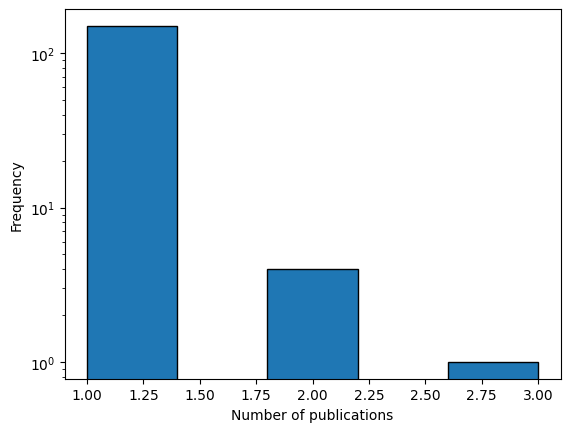

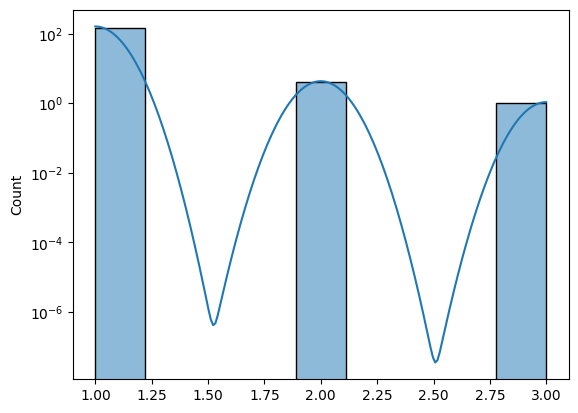

In [15]:
no_of_publications_by_each_author = [x['number_of_publications'] for x in authors_and_their_publications_dataset]
print(no_of_publications_by_each_author)

plt.hist(no_of_publications_by_each_author, bins=5, log=True, edgecolor='black')
plt.xlabel('Number of publications')
plt.ylabel('Frequency')
plt.show()

sns.histplot(no_of_publications_by_each_author, kde=True, log=True)
plt.show()

In [18]:
from statistics import mean, stdev

In [19]:
avg = mean(no_of_publications_by_each_author)
standard_deviation = stdev(no_of_publications_by_each_author)
print("Mean =", avg)
print("Standard Deviation =", standard_deviation)

Mean = 1.038709677419355
Standard Deviation = 0.22458825146909892


In [20]:
import numpy as np

In [ ]:
q1 = np.quantile(no_of_publications_by_each_author, 0.25)
q2 = np.quantile(no_of_publications_by_each_author, 0.5)
q3 = np.quantile(no_of_publications_by_each_author, 0.75)

print("Quartile1 =", q1)
print("Median =", q2)
print("Quartile3 =", q3)
print("\n\n")

In [40]:
venues_and_their_publications_dataset = []

for venue in unique_venues:
    current_venues_publications = []
    current_venues_indexes = []
    current_venues_record = {'venue': venue}
    for record in entire_dataset:
        if 'venue' in record:
            if venue == record['venue']:
                current_venues_publications.append(record['title'])
                current_venues_indexes.append(record['index'])
    current_venues_record['all_publications'] = current_venues_publications
    current_venues_record['all_indexes'] = current_venues_indexes
    current_venues_record['number_of_publications'] = len(current_venues_publications)
    venues_and_their_publications_dataset.append(current_venues_record)

print(venues_and_their_publications_dataset)
print("\n\n\n")

venues_and_their_publications_dataset.sort(key=lambda x: x['number_of_publications'], reverse=False)
print(venues_and_their_publications_dataset)

[{'venue': 'Automated microcode synthesis', 'all_publications': ['Automated microcode synthesis'], 'all_indexes': [51], 'number_of_publications': 1}, {'venue': 'Introduction to computer science using the TURING programming language', 'all_publications': ['Introduction to computer science using the TURING programming language'], 'all_indexes': [84], 'number_of_publications': 1}, {'venue': 'Simulation', 'all_publications': ['The DISS methodology of distributed system simulation'], 'all_indexes': [60], 'number_of_publications': 1}, {'venue': 'Physical structures and application on Database design techniques II', 'all_publications': ['Physical structures and application on Database design techniques II', 'Physical database design techniques', 'Design of optimal balanced filing schemes', 'Parallel join and sorting algorithms', 'A language for office and business automation', 'APAD: an application-adaptable database system - its architecture and design -', 'Specific requirements in engineeri

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 8, 8, 12]


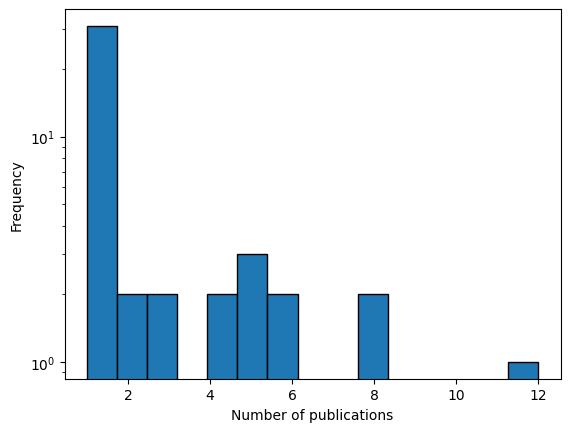

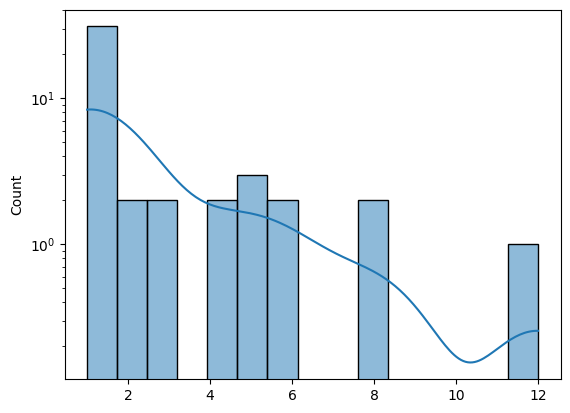

Mean = 2.311111111111111
Standard Deviation = 2.4663390445817224
Quartile1 = 1.0
Median = 1.0
Quartile3 = 3.0



Venue with maximum number of publications: Proc. IFIP working conference on Programming Languages and System Design -  12


In [28]:
no_of_publications_in_each_venue = [x['number_of_publications'] for x in venues_and_their_publications_dataset]
print(no_of_publications_in_each_venue)

plt.hist(no_of_publications_in_each_venue, bins=15, log=True, edgecolor='black')
plt.xlabel('Number of publications')
plt.ylabel('Frequency')
plt.show()

sns.histplot(no_of_publications_in_each_venue, kde=True, bins=15, log=True)
plt.show()

avg = mean(no_of_publications_in_each_venue)
standard_deviation = stdev(no_of_publications_in_each_venue)
print("Mean =", avg)
print("Standard Deviation =", standard_deviation)

q1 = np.quantile(no_of_publications_in_each_venue, 0.25)
q2 = np.quantile(no_of_publications_in_each_venue, 0.5)
q3 = np.quantile(no_of_publications_in_each_venue, 0.75)

print("Quartile1 =", q1)
print("Median =", q2)
print("Quartile3 =", q3)
print("\n\n")

print("Venue with maximum number of publications:", venues_and_their_publications_dataset[-1]['venue'], no_of_publications_in_each_venue[-1])

In [14]:
no_of_references = []

for each_record in entire_dataset:
    new_dict = {'title': each_record['title'], 'year': each_record['year']}
    if 'citations' in each_record:
        new_dict['no_of_references'] = len(each_record['citations'])
    else:
        new_dict['no_of_references'] = 0
    no_of_references.append(new_dict)

no_of_references.sort(key=lambda x: x['no_of_references'], reverse=False)
print(no_of_references)
print(len(no_of_references))
print("Publication with maximum number of references:", no_of_references[-1]['title'], "-", no_of_references[-1]['no_of_references'])



[{'title': 'MOSFET table look-up models for circuit simulation', 'year': 1984, 'no_of_references': 0}, {'title': 'The verification of the protection mechanisms of high-level language machines', 'year': 1984, 'no_of_references': 0}, {'title': 'Another view of functional and multivalued dependencies in the relational database model', 'year': 1984, 'no_of_references': 0}, {'title': 'Entity-relationship diagrams which are in BCNF', 'year': 1984, 'no_of_references': 0}, {'title': 'The computer comes of age', 'year': 1984, 'no_of_references': 0}, {'title': 'Computationally efficient algorithms for a one-time pad scheme', 'year': 1984, 'no_of_references': 0}, {'title': 'The hierarchical ordering in Multiattribute files', 'year': 1983, 'no_of_references': 0}, {'title': 'Insertion languages', 'year': 1983, 'no_of_references': 0}, {'title': 'Computability with Pascal', 'year': 1984, 'no_of_references': 0}, {'title': 'Ambiguity and decision problems concerning number systems', 'year': 1984, 'no_o

In [16]:
no_of_citations = []

for record in entire_dataset:
    new_dict = {'title': record['title'], 'no_of_citations': 0, 'index': record['index'], 'year': record['year']}
    no_of_citations.append(new_dict)

no_of_citations.sort(key=lambda x: x['index'], reverse=False)
max_index = len(no_of_citations) - 1

for each_record in entire_dataset:
    if 'citations' in each_record:
        for citation in each_record['citations']:
            if int(citation) > max_index:
                continue
            else:
                no_of_citations[int(citation)-1]['no_of_citations'] += 1

no_of_citations.sort(key=lambda x: x['no_of_citations'], reverse=False)
print(no_of_citations)
print("Publication that was cited maximum number of times:", no_of_citations[max_index]['title'], "-", no_of_citations[max_index]['no_of_citations'])


[{'title': 'MOSFET table look-up models for circuit simulation', 'no_of_citations': 0, 'index': 1, 'year': 1984}, {'title': 'The verification of the protection mechanisms of high-level language machines', 'no_of_citations': 0, 'index': 2, 'year': 1984}, {'title': 'Another view of functional and multivalued dependencies in the relational database model', 'no_of_citations': 0, 'index': 3, 'year': 1984}, {'title': 'Entity-relationship diagrams which are in BCNF', 'no_of_citations': 0, 'index': 4, 'year': 1984}, {'title': 'The computer comes of age', 'no_of_citations': 0, 'index': 5, 'year': 1984}, {'title': 'Computationally efficient algorithms for a one-time pad scheme', 'no_of_citations': 0, 'index': 6, 'year': 1984}, {'title': 'The hierarchical ordering in Multiattribute files', 'no_of_citations': 0, 'index': 7, 'year': 1983}, {'title': 'Insertion languages', 'no_of_citations': 0, 'index': 8, 'year': 1983}, {'title': 'The Three-Machine No-Wait Flow Shop is NP-Complete', 'no_of_citation

[{'venue': 'Automated microcode synthesis', 'all_publications': ['Automated microcode synthesis'], 'all_indexes': [51], 'number_of_publications': 1, 'total_citationsin_this_venue': 0, 'impact_factor': 0.0}, {'venue': 'Introduction to computer science using the TURING programming language', 'all_publications': ['Introduction to computer science using the TURING programming language'], 'all_indexes': [84], 'number_of_publications': 1, 'total_citationsin_this_venue': 0, 'impact_factor': 0.0}, {'venue': 'Simulation', 'all_publications': ['The DISS methodology of distributed system simulation'], 'all_indexes': [60], 'number_of_publications': 1, 'total_citationsin_this_venue': 0, 'impact_factor': 0.0}, {'venue': 'VAX/VMS internals and data structures', 'all_publications': ['VAX/VMS internals and data structures'], 'all_indexes': [78], 'number_of_publications': 1, 'total_citationsin_this_venue': 0, 'impact_factor': 0.0}, {'venue': 'Analysis of speedup in distributed algorithms', 'all_publicat

(array([44.,  0.,  0.,  1.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

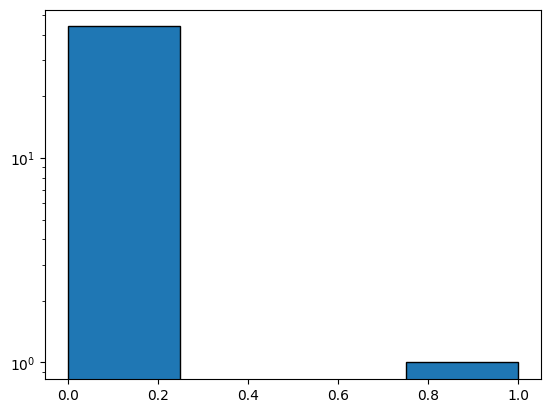

In [46]:
for each_venue_record in venues_and_their_publications_dataset:
    total_citations_in_this_venue = 0
    for index in each_venue_record['all_indexes']:
        for record in no_of_citations:
            if record['index'] == index:
                total_citations_in_this_venue += record['no_of_citations']
    each_venue_record['total_citationsin_this_venue'] = total_citations_in_this_venue
    each_venue_record['impact_factor'] = total_citations_in_this_venue/each_venue_record['number_of_publications']

print(venues_and_their_publications_dataset)
print("\n\n\n")

impact_factor_list = [x['impact_factor'] for x in venues_and_their_publications_dataset]
print(impact_factor_list)
plt.hist(impact_factor_list, bins=30, log=True, edgecolor='black')

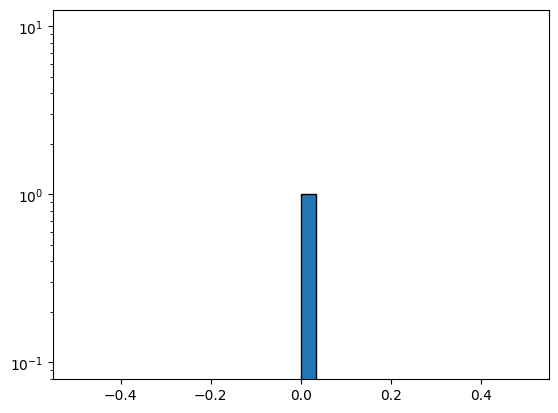

[{'index': 102, 'no_of_citations': 1}]
Median = 1
Average = 1.0


In [48]:
venues_with_atleast_10_publications = filter(lambda x: x['number_of_publications'] >= 10, venues_and_their_publications_dataset)
new_impact_factor_list = [x['impact_factor'] for x in venues_with_atleast_10_publications]
plt.hist(new_impact_factor_list, bins=30, log=True, edgecolor='black')
plt.show()

venues_and_their_publications_dataset.sort(key=lambda x: x['impact_factor'], reverse=False)
citation_counts_for_publications_in_venue_with_max_impact_factor = []
for ind in venues_and_their_publications_dataset[-1]['all_indexes']:
    temp_dict = {"index": ind}
    for rec in no_of_citations:
        if rec['index'] == ind:
            temp_dict['no_of_citations'] = rec['no_of_citations']
    citation_counts_for_publications_in_venue_with_max_impact_factor.append(temp_dict)
print(citation_counts_for_publications_in_venue_with_max_impact_factor)

list_of_citation_counts = [x['no_of_citations'] for x in citation_counts_for_publications_in_venue_with_max_impact_factor]
median_of_citation_counts = statistics.median(list_of_citation_counts)

print("Median =", median_of_citation_counts)
print("Average =", venues_and_their_publications_dataset[-1]['impact_factor'])

[{'avg_no_of_citations_per_pub': 0,
  'avg_no_of_references_per_pub': 0,
  'no_of_citations': 0,
  'no_of_publications': 10,
  'no_of_references': 0,
  'year': 1982},
 {'avg_no_of_citations_per_pub': 0,
  'avg_no_of_references_per_pub': 0,
  'no_of_citations': 0,
  'no_of_publications': 33,
  'no_of_references': 0,
  'year': 1983},
 {'avg_no_of_citations_per_pub': 0,
  'avg_no_of_references_per_pub': 0,
  'no_of_citations': 0,
  'no_of_publications': 61,
  'no_of_references': 0,
  'year': 1984}]



[{'avg_no_of_citations_per_pub': 0.0,
  'avg_no_of_references_per_pub': 0.0,
  'no_of_citations': 0,
  'no_of_publications': 10,
  'no_of_references': 0,
  'year': 1982},
 {'avg_no_of_citations_per_pub': 0.030303030303030304,
  'avg_no_of_references_per_pub': 0.5454545454545454,
  'no_of_citations': 1,
  'no_of_publications': 33,
  'no_of_references': 18,
  'year': 1983},
 {'avg_no_of_citations_per_pub': 0.0,
  'avg_no_of_references_per_pub': 0.6885245901639344,
  'no_of_citations': 0,
  'no

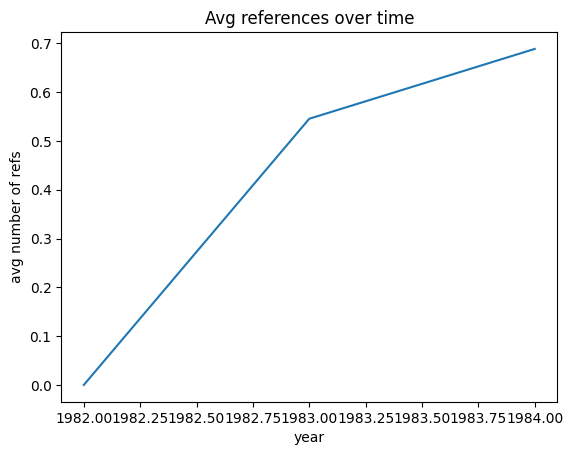

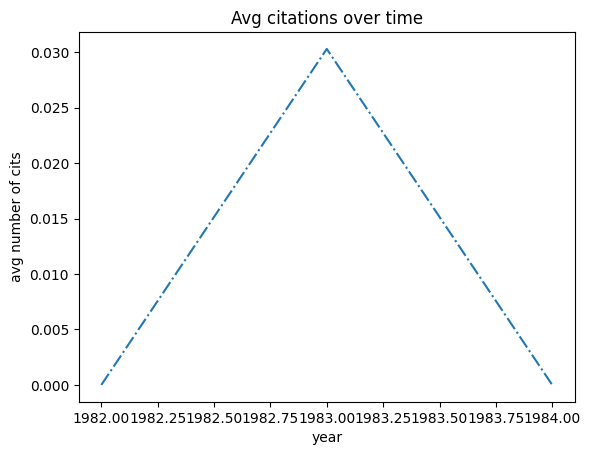

In [22]:
from pprint import pprint
import matplotlib.pyplot as plt

all_years = [each_datapoint['year'] for each_datapoint in entire_dataset if 'year' in each_datapoint]
min_year = min(all_years)
max_year = max(all_years)
years = [
    {'year': i, 
     'no_of_publications': 0, 
     'no_of_references': 0, 
     'no_of_citations': 0, 
     'avg_no_of_references_per_pub': 0, 
     'avg_no_of_citations_per_pub': 0}
     for i in range(min_year, max_year+1)]

for rec in entire_dataset:
    if 'year' in rec:
        yr = rec['year']
    else:
        continue
    ind = yr - min_year
    years[ind]['no_of_publications'] += 1

pprint(years)
print("\n\n")

for rec in no_of_references:
    yr = rec['year']
    ind = yr - min_year
    years[ind]['no_of_references'] += rec['no_of_references']

for rec in no_of_citations:
    yr = rec['year']
    ind = yr - min_year
    years[ind]['no_of_citations'] += rec['no_of_citations']


for rec in years:
    rec['avg_no_of_references_per_pub'] = rec['no_of_references'] / rec['no_of_publications']
    rec['avg_no_of_citations_per_pub'] = rec['no_of_citations'] / rec['no_of_publications']

pprint(years)

avg_refs = [each_year['avg_no_of_references_per_pub'] for each_year in years]
avg_cit = [each_year['avg_no_of_citations_per_pub'] for each_year in years]
yrs = [each_year['year'] for each_year in years]

plt.plot(yrs, avg_refs)
plt.xlabel("year")
plt.ylabel("avg number of refs")
plt.title("Avg references over time")
plt.show()

plt.figure()
plt.plot(yrs, avg_cit, '-.')
plt.xlabel("year")
plt.ylabel("avg number of cits")
plt.title("Avg citations over time")
plt.show()